<h1>Ciência dos Dados - 2021.1: Projeto 2</h1>
<h2>Previsão de metascore a partir de dados secundários</h2>

<h3>Integrantes:</h3>

- Gabriel Hideki Stanzani Onishi
- Lucca de Paiva Barroso Saraiva

<h2>Objetivos do Projeto</h2>

A arte é integral para a evolução do ser humano. Expressar-se através de um poema, de um desenho ou de um filme é parte do que nos faz únicos nesse planeta. Não é a toa que para alguns filósofos, como o alemão Friedrich Nietzsche, a arte é o motor que nos faz evoluir como espécie, sendo a nossa esperança de chegar na melhor versão de nós mesmos. Tão notável quanto a arte em si, contudo, é a impressão que a acompanha.

Todos saímos de um filme com uma impressão diferente, mas são poucos que tem a sua opinião validada e levada para milhares de outras pessoas. Críticos são os responsáveis pela dificílima tarefa de fazer o julgamento mais próximo da verdade e transmiti-lo para aqueles que ainda não puderam experenciar a obra (além daqueles que querem ter o seu julgamento comparado, é claro). Não há, entretanto, um conjunto de regras que esses profissionais tenham que seguir$^1$ para resumir em uma nota algo tão subjetivo quanto um filme, o que faz com que certos vieses se manifestem.

Um exemplo claro está presente na maior premiação anual de cinema. Os prêmios da Academia de Cinema dos Estados Unidos ou, como são popularmente conhecidos, os Oscars, tem um segredo que poucos sabem. Os vencedores de melhor filme do evento seguem um notável padrão, e filmes que o respeitam recebem até receberam um apelido: "Oscar Baits", ou Iscas de Oscar. Em um estudo mencionado nesse <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo</a> da Business Insider revela que assustadores 94% dos vencedores pertencem à categoria drama contra apenas 2% de filmes de ação e aventura. Além disso, o texto sugere que há uma preferência para filmes longos (e portanto teoricamente mais importantes) - 76% dos vencedores desde 1960 têm mais de duas horas de duração.

Munidos da curiosidade de verificar esses viéses em uma base de dados maior, os alunos se propuseram a analisar um conjunto de mais de 80 mil filmes para que, através de dados secundários (como gênero, duração, país de origem e língua principal), seja possível estimar o metascore$^2$ de outros longas. Esperamos que esse estudo sirva de inspiração para que se desmistifique a nota de críticos como autoridades absolutas, dando mais conforto para que aqueles que gostem de cinema possam ter opinião própria sem precisar se basear em reviews.

$^1$É claro que houve tentativas na história da filosofia de se padronizar a forma de crítica da arte. O empirista escocês David Hume foi um dos teóricos dessa área, tendo escrito uma série de regras para que o "tastemaker" (ou fazedor de gosto, numa tradução literal) chegue o mais próximo possível de uma resenha informal acerca do objeto estudado.<br>
$^2$Metascore é uma nota atribuida sobre uma obra pelo site Metascore. Para a nota final, leva-se em conta um conjunto de críticas de meios de comunicação

<h2> Parte 0: Importando elementos</h2>

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#função para regressão
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [3]:
# Importando planilha de dados brutos
dados_bruto = pd.read_csv('IMDb movies.csv')
#Mostrando o dataset inicial
dados_bruto.head()

C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


<h2>Parte I: Limpeza inicial</h2>

In [4]:
#Seleção de Colunas relevantes
dados = dados_bruto[['original_title','year', 'genre', 'country', 'language','worlwide_gross_income','budget', 'metascore', 'duration' ]]

#Remoção de valores nulos (NaN)
dados = dados.dropna()
dados

,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
506,Metropolis,1927,"Drama, Sci-Fi",Germany,German,$ 1349711,DEM 6000000,98.0,153
628,The Circus,1928,"Comedy, Romance",USA,English,$ 26916,$ 900000,90.0,72
1048,City Lights,1931,"Comedy, Drama, Romance",USA,English,$ 46008,$ 1500000,99.0,87
1086,Frankenstein,1931,"Drama, Horror, Romance",USA,"English, Latin",$ 1626,$ 291000,91.0,70
1301,Freaks,1932,"Drama, Horror",USA,"English, German, French",$ 4072,$ 310607,80.0,64
...,...,...,...,...,...,...,...,...,...
85397,Jexi,2019,"Comedy, Romance","USA, Canada",English,$ 9341824,$ 5000000,39.0,84
85460,Tenki no ko,2019,"Animation, Drama, Family","Japan, China",Japanese,$ 193176979,$ 11100000,72.0,112
85503,Tommaso,2019,Drama,"Italy, UK, USA, Greece","English, Italian, Russian",$ 23588,EUR 3000000,66.0,115
85592,Quezon's Game,2018,"Drama, History",Philippines,English,$ 5986,$ 500000,36.0,127


In [5]:
#analisando o tipo de dados de cada uma das colunas
dados.dtypes

original_title            object
year                      object
genre                     object
country                   object
language                  object
worlwide_gross_income     object
budget                    object
metascore                float64
duration                   int64
dtype: object

In [6]:
#Fazendo seleção de uma planilha de treinamento com filmes do ano de 1985 - 2000
#Dessa forma minimizamos a depreciação do dinheiro (inflação)

#todos dados estão como object, por isso é necessário trocar para os tipos de variáveis adequados
dados.year = dados.year.astype('int')
dados = dados.loc[(dados.year>=1985) & (dados.year<=2000),:]
dados.head()

,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
21389,The Falcon and the Snowman,1985,"Biography, Crime, Drama","UK, USA, Mexico",English,$ 17130087,$ 12000000,68.0,131
21425,Godzilla 1985,1985,"Action, Horror, Sci-Fi",Japan,"Japanese, Russian, English",$ 4116395,$ 2000000,31.0,82
21784,After Hours,1985,"Comedy, Crime, Drama",USA,English,$ 10609321,$ 4500000,90.0,97
21785,Agnes of God,1985,"Drama, Mystery",USA,"English, French, Latin",$ 25627836,$ 10000000,52.0,98
21795,American Ninja,1985,"Action, Adventure, Romance","USA, Philippines","English, Spanish, Japanese",$ 10499694,$ 1000000,20.0,95


In [7]:
# Selecionando apenas filmes com budget medido em dólar (começa com $) para uniformizar
dados = dados.loc[dados.budget.str.startswith('$'),:]

#Removendo cifrão da tabela de bilheteria e budget para trabalharmos com float
#Removendo vírgulas das colunas de gênero, country e language para guardarmos eles em variáveis adequadas
def removepont(text):
    cif = '[$,]' 
    pattern = re.compile(cif)
    text_subbed = re.sub(pattern,'', text)
    return text_subbed

dados.worlwide_gross_income = dados.worlwide_gross_income.apply(removepont)
dados.budget = dados.budget.apply(removepont)
dados.genre = dados.genre.apply(removepont)
dados.country = dados.country.apply(removepont)
dados.language = dados.language.apply(removepont)
dados.worlwide_gross_income = dados.worlwide_gross_income.astype('float')
dados.year = dados.year.astype('int')
dados.budget = dados.budget.astype('float')

In [8]:
# reindexando as linhas para facilitar trabalho
dados.reset_index(inplace=True)

In [9]:
dados['drama'] = 0
dados['comedy'] = 0
dados['action'] = 0

In [10]:
#lendo a coluna genre de cada linha e vendo a qual gênero pertence
for i in range(len(dados)):
    for genre in dados.iloc[i].genre.split():
        if genre == 'Drama':
            dados.at[i,'drama'] = 1
        if genre == 'Comedy':
            dados.at[i,'comedy'] = 1
        if genre == 'Action':
            dados.at[i,'action'] = 1

In [11]:
#Fazendo o mesmo processo para língua e para país de origem
#Buscamos diferenciar filmes feitos nos EUA do resto do mundo e filmes em ingles com filmes em língua estrangeiros
dados['americano'] = 0
dados['em_ingles'] = 0

In [12]:
for i in range(len(dados)):
    for country in dados.iloc[i].country.split():
        if country == 'USA':
            dados.at[i,'americano'] = 1
            break
        else:
            dados.at[i,'americano'] = 0
    for lang in dados.iloc[i].language.split():
        if lang =='English':
            dados.at[i,'em_ingles'] = 1
            break
        else:
            dados.at[i,'em_ingles'] = 0

In [13]:
dados.head(5)

,index,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration,drama,comedy,action,americano,em_ingles
0,21389,The Falcon and the Snowman,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,131,1,0,0,1,1
1,21425,Godzilla 1985,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,82,0,0,1,0,1
2,21784,After Hours,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,97,1,1,0,1,1
3,21785,Agnes of God,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,98,1,0,0,1,1
4,21795,American Ninja,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,95,0,0,1,1,1


<h2>Parte 2: Análise Exploratória</h2>

<h3>Analisando Distribuição de Metascore</h3>

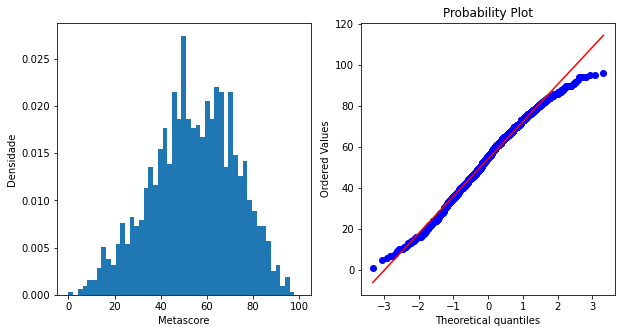

In [14]:
# Fazendo análise da distribuição do metascore
plt.figure(figsize=(10,5))

plt.subplot(121)
faixa = np.linspace(0,100,50)
plt.hist(dados.metascore,density=True,bins=faixa)
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(122)
stats.probplot(dados.metascore,dist='norm',plot=plt)
plt.show()

In [15]:
print(dados.metascore.mean())
print(dados.metascore.std())

54.226863753213365
18.21618864303207


Como se pode observar, o metascore tem uma distribuição próxima à normal, apesar de ter caudas menos expressivas. A média do metascore foi 54.21 pontos, com um desvio-padrão de 18.21 pontos.

<h3> Analisando Correlação Metascore-Rendimento

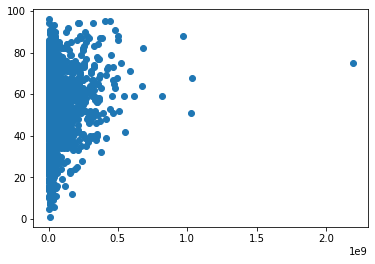

In [16]:
plt.scatter(dados['worlwide_gross_income'], dados.metascore)
plt.show()

In [17]:
#removendo outlier na coluna de receita mundial
dados = dados.loc[dados['worlwide_gross_income']<2000000000,:]
print(dados.worlwide_gross_income.corr(dados.metascore))

0.16230899203506935


Analisando o gráfico e a correlação, pode-se dizer que há uma leve tendência de filmes mais rentáveis terem maior nota.

<h3> Analisando Correlação Metascore-Orçamento

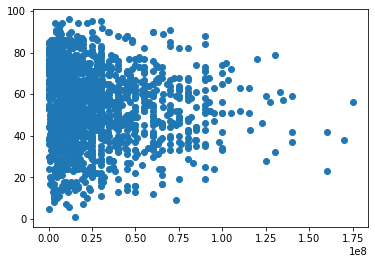

In [18]:
plt.scatter(dados.budget,dados.metascore)
plt.show()

In [19]:
dados.budget.corr(dados.metascore)

-0.080842673448128

O orçamento não parece ter um efeito muito grande no metascore, dado a baixa correlação.

<h3>Analisando Correlação Metascore-Duração

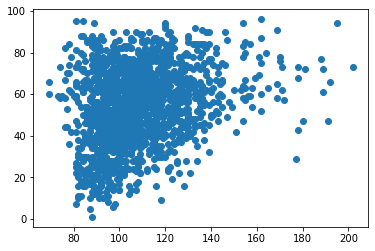

In [20]:
plt.scatter(dados.duration, dados.metascore)
plt.show()

In [21]:
dados.duration.corr(dados.metascore)

0.27282851451587986

A duração parece ter um leve peso no metascore de um filme, com filmes mais longos tendo uma leve tendência a terem notas mais altas. Isso condiz com o estudo citado na introdução, que dizia que filmes mais longos tinham uma maior chance de ganhar o oscar por serem considerados mais importantes.

<h3>Analisando Para Gêneros Diferentes</h3>

In [22]:
filme_acao = dados.loc[dados.action==1]
filme_drama = dados.loc[dados.drama==1]
filme_comedia = dados.loc[dados.comedy==1]

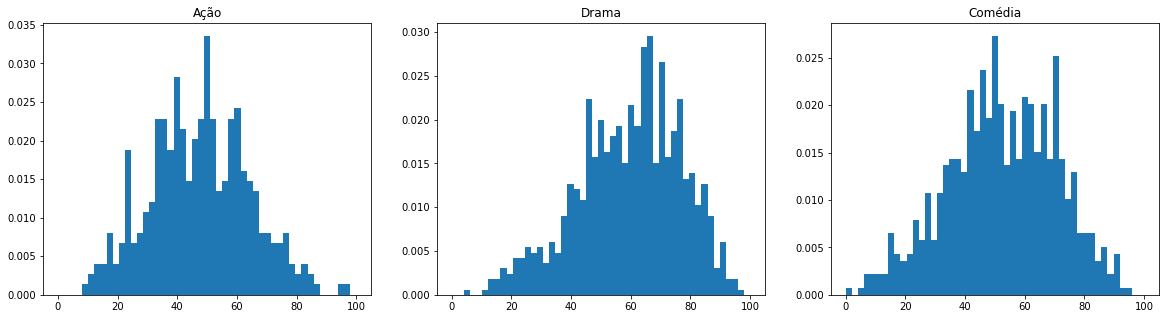

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(filme_acao.metascore,density=True,bins=faixa)
plt.title('Ação')

plt.subplot(132)
plt.hist(filme_drama.metascore,density=True,bins=faixa)
plt.title('Drama')

plt.subplot(133)
plt.hist(filme_comedia.metascore,density=True,bins=faixa)
plt.title('Comédia')

plt.show()

In [24]:
print(f'A média do metascore de filmes da categoria drama é {filme_drama.metascore.mean()}')
print(f'A média do metascore de filmes da categoria comédia é {filme_comedia.metascore.mean()}')
print(f'A média do metascore de filmes da categoria ação é {filme_acao.metascore.mean()}')

A média do metascore de filmes da categoria drama é 59.54064039408867
A média do metascore de filmes da categoria comédia é 52.38563049853372
A média do metascore de filmes da categoria ação é 47.50958904109589


Observa-se que filmes de gênero drama tem a maior média entre os demais, enquanto os de filme de ação dem a menor. Além disso, parece que o metascore se distribui de maneira próxima à normal dentro dos gêneros de filme.

<h3>Analisando Para Línguas e Países Diferentes</h3>

In [25]:
filme_americano = dados.loc[dados.americano==1]
filme_estrangeiro = dados.loc[dados.americano==0]
filme_em_ingles = dados.loc[dados.em_ingles==1]
filme_sem_ingles = dados.loc[dados.em_ingles==0]

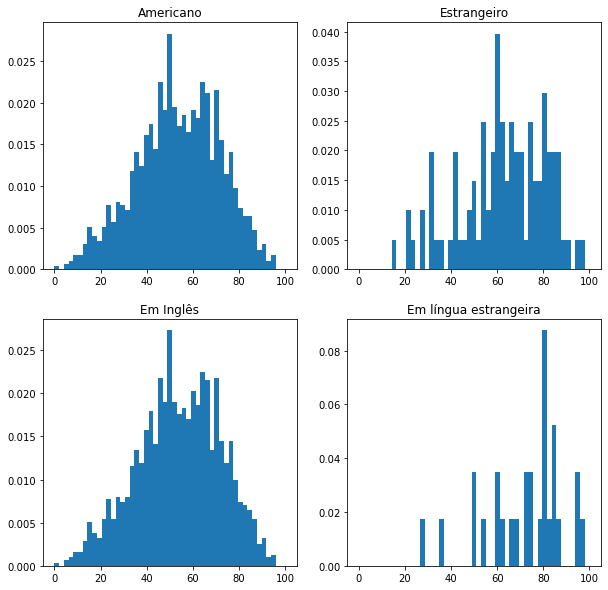

In [26]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(filme_americano.metascore,density=True,bins=faixa)
plt.title('Americano')

plt.subplot(222)
plt.hist(filme_estrangeiro.metascore,density=True,bins=faixa)
plt.title('Estrangeiro')

plt.subplot(223)
plt.hist(filme_em_ingles.metascore,density=True,bins=faixa)
plt.title('Em Inglês')

plt.subplot(224)
plt.hist(filme_sem_ingles.metascore,density=True,bins=faixa)
plt.title('Em língua estrangeira')

plt.show()

In [27]:
print(f'A média do metascore de filmes americanos é {filme_americano.metascore.mean()}')
print(f'A média do metascore de filmes estrangeiros é {filme_estrangeiro.metascore.mean()}')
print(f'A média do metascore de filmes em inglês é {filme_em_ingles.metascore.mean()}')
print(f'A média do metascore de filmes em língua estrangeira é {filme_sem_ingles.metascore.mean()}')

A média do metascore de filmes americanos é 53.644917582417584
A média do metascore de filmes estrangeiros é 62.57575757575758
A média do metascore de filmes em inglês é 53.88539620170268
A média do metascore de filmes em língua estrangeira é 72.10714285714286


In [28]:
print(len(filme_estrangeiro))
print(len(filme_sem_ingles))

99
28


Observa-se que a média de um filme estrangeiro é maior do que a média de filmes americanos, enquanto filmes em língua estrangeira tem um metascore gritantemente mais alto do que os demais. Isso se deve ao fato do metascore ter como base reviews de meios de comunicação americanos. Dessa forma, é muito mais provável que um filme em língua estrangeira não seja avaliado a não ser que já haja uma boa reputação internacional, indicando que "merece ser assistido". Isso explica também o baixo número de filmes de outros países ou em outras línguas e os histogramas mais esburacados.

<h3>Dividindo Base de Dados Entre Categorias e Conjugados

In [29]:
dados_drama = dados.loc[dados.drama==1,:]
print(dados_drama.duration.corr(dados_drama.metascore))

0.17399236781639035


In [30]:
dados_ndrama = dados.loc[dados.drama==0,:]
dados_ndrama.budget.corr(dados_ndrama.metascore)

0.057449183996364186

In [31]:
dados_acao = dados.loc[dados.action==1,:]
dados_nacao = dados.loc[dados.action==0,:]
print(dados_acao.budget.corr(dados_acao.metascore))
print(dados_nacao.budget.corr(dados_nacao.metascore))

0.10604185893844252
-0.08390990689687469


<h3>Plotando Gráficos Comparativos

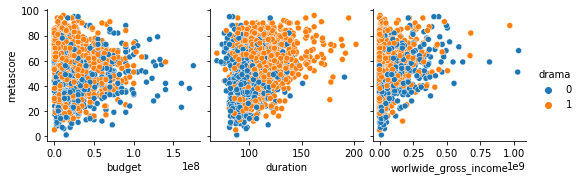

In [32]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='drama')
plt.show()

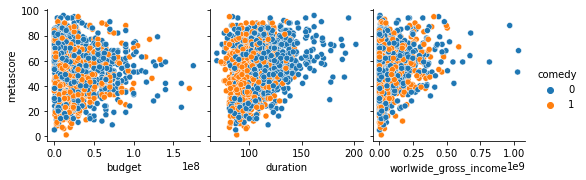

In [33]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='comedy')
plt.show()

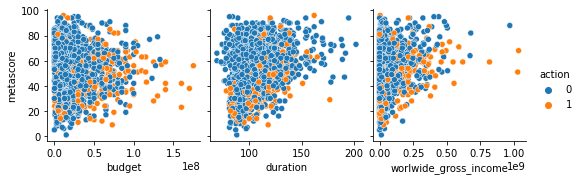

In [34]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='action')
plt.show()

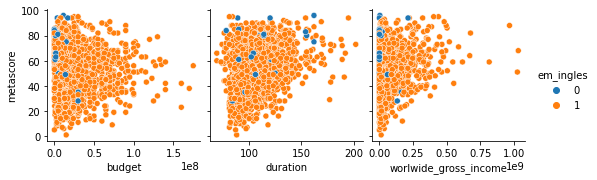

In [35]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='em_ingles')
plt.show()

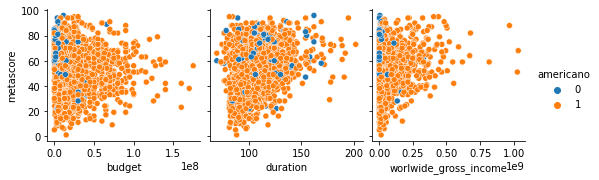

In [36]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='americano')
plt.show()

In [37]:
dados.corr()

,index,year,worlwide_gross_income,budget,metascore,duration,drama,comedy,action,americano,em_ingles
index,1.000000,0.965832,0.054125,0.262667,-0.090584,0.026878,0.105556,-0.001379,-0.082589,-0.035643,-0.116656
year,0.965832,1.000000,0.093252,0.330142,-0.080583,0.055627,0.105310,-0.000222,-0.075098,0.004921,-0.055584
worlwide_gross_income,0.054125,0.093252,1.000000,0.535079,0.162309,0.236461,-0.119359,-0.054845,0.192611,0.106962,0.054704
budget,0.262667,0.330142,0.535079,1.000000,-0.080843,0.302360,-0.121682,-0.089462,0.275030,0.140439,0.098066
metascore,-0.090584,-0.080583,0.162309,-0.080843,1.000000,0.272829,0.305845,-0.088727,-0.203904,-0.119752,-0.133071
duration,0.026878,0.055627,0.236461,0.302360,0.272829,1.000000,0.386472,-0.342322,0.033355,-0.053490,-0.002383
drama,0.105556,0.105310,-0.119359,-0.121682,0.305845,0.386472,1.000000,-0.267577,-0.263055,-0.059604,-0.032713
comedy,-0.001379,-0.000222,-0.054845,-0.089462,-0.088727,-0.342322,-0.267577,1.000000,-0.235707,0.087157,0.051463
action,-0.082589,-0.075098,0.192611,0.275030,-0.203904,0.033355,-0.263055,-0.235707,1.000000,0.007693,-0.039112
americano,-0.035643,0.004921,0.106962,0.140439,-0.119752,-0.053490,-0.059604,0.087157,0.007693,1.000000,0.459882


<h3> Aplicando Regressão Linear

In [38]:
Y = dados['metascore']

X = dados[['action', 'drama', 'comedy', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]

#modelo com todas as variáveis explicativas

results = regress(Y,X)
display(results.summary())

while len(results.params)>3:
    
    #buscando os p-values com nível de significância menor do que 5%
    if results.pvalues.max()<0.05:
        break
        
    # Identifica variável com maior valor-p
    i = list(results.pvalues).index(results.pvalues.max())    
    remove = results.pvalues.index[i]
    X.drop(remove, axis=1, inplace=True)
    print("REMOVIDA A VARIÁVEL ", remove)
    
    print("\n\n")
    results = regress(Y,X)
    display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     57.69
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.93e-82
Time:                        15:49:14   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1546   BIC:                         1.310e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.4691      4.169     11.866      0.000      41.291      57.647
action                   -7.0113      1.084     -6.471      0.000      -9.137      -4.886
drama                     6.9042      0.977      7.068      0.000       4.988       8.820
comedy                   -0.0943      0.929     -0.102      0.919      -1.916       1.727
budget                 -1.48e-07   1.96e-08     -7.549      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3752      3.452     -4.164      0.000     -21.147      -7.603
americano                -3.7193      1.900     -1.958      0.050      -7.446       0.008
worlwide_gross_income  4.889e-08   4.44e-09     11.011      0.000    4.02e-08    5.76e-08
duration                  0.1932      0.027      7.174      0.000       0.140       0.246
==============================================================================
Omnibus:                       21.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.598
Skew:                          -0.233   Prob(JB):                     5.55e-05
Kurtosis:                       2.708   Cond. No.                     1.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  comedy





C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     65.97
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.30e-83
Time:                        15:49:15   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1547   BIC:                         1.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.3531      4.008     12.312      0.000      41.491      57.216
action                   -6.9780      1.033     -6.757      0.000      -9.004      -4.952
drama                     6.9271      0.950      7.290      0.000       5.063       8.791
budget                 -1.48e-07   1.96e-08     -7.555      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3760      3.451     -4.166      0.000     -21.146      -7.606
americano                -3.7301      1.896     -1.967      0.049      -7.450      -0.010
worlwide_gross_income  4.888e-08   4.44e-09     11.014      0.000    4.02e-08    5.76e-08
duration                  0.1938      0.026      7.392      0.000       0.142       0.245
==============================================================================
Omnibus:                       21.046   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.600
Skew:                          -0.233   Prob(JB):                     5.54e-05
Kurtosis:                       2.708   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dessa forma vemos que os parâmetros mais importantes são se o filme pertence ao gênero de ação ou drama, o seu orçamento, se o filme está em inglês, se ele é americano, sua receita mundial e a duração do filme (a única variável que não contribui é se o gênero do filme é comédia)

In [39]:
#Redefinindo variáveis de contorno
X = dados[['action', 'drama', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]

In [40]:
#Criando planilhas de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(933, 7)
(622, 7)
(933,)
(622,)


In [41]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
sns.regplot(y_test,predictions)
plt.title('Validação do modelo linear')
#plt.xlabel('metascore')
plt.plot()

In [ ]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [ ]:
results = regress(Y,X)
results.summary()

In [ ]:
y_predito = results.predict(sm.add_constant(X))
print(f'Modelo Inicial: MAE = {(abs(Y - y_predito)).mean()}')

In [ ]:
results = regress(Y,X)
results.summary()

In [ ]:
stats.probplot(results.resid, dist='norm', plot=plt)
plt.show()

In [ ]:
Y = dados['metascore']

X2 = dados[['action', 'drama', 'comedy', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]


results2 = results # Modelo com todas as variáveis
display(results.summary())


while len(results2.params)>3:
    if results2.pvalues.max()<0.1:
        break
    
    
    # Identifica variável com maior valor-p
    i = list(results2.pvalues).index(results2.pvalues.max())    
    remove = results2.pvalues.index[i]
    X2.drop(remove, axis=1, inplace=True)
    print("REMOVIDA A VARIÁVEL ", remove)
    
    print("\n\n")
    results2 = regress(Y,X2)
    display(results2.summary())

In [ ]:
#verificando a normalidade dos residuos(erros)
residuos = results2.resid

plt.figure(figsize=(6,4))
stats.probplot(residuos, dist='norm', plot=plt);

In [ ]:
feature1 = X2["drama"]
feature2 = X2["worlwide_gross_income"]

# Recupera os parâmetros calculados
beta0_hat = results2.params[0]  
beta1_hat = results2.params[1]  
beta2_hat = results2.params[2]  

def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

npoints = 100
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)
fit_z = f(eixo_x, eixo_y)